## 讀取MNIST 數據

In [1]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

Using TensorFlow backend.


In [2]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## 建立  Deep Auto Encoders

In [3]:
from keras.layers import Input, Dense
from keras.models import Model

input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.3421 - val_loss: 0.2646
Epoch 2/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.2590 - val_loss: 0.2551
Epoch 3/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.2489 - val_loss: 0.2408
Epoch 4/100
60000/60000 [==============================] - 3s 46us/step - loss: 0.2305 - val_loss: 0.2194
Epoch 5/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.2120 - val_loss: 0.2038
Epoch 6/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.1982 - val_loss: 0.1929
Epoch 7/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.1898 - val_loss: 0.1850
Epoch 8/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.1843 - val_loss: 0.1795
Epoch 9/100
60000/60000 [====

60000/60000 [==============================] - 3s 54us/step - loss: 0.1061 - val_loss: 0.1055
Epoch 75/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.1060 - val_loss: 0.1046
Epoch 76/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.1058 - val_loss: 0.1045
Epoch 77/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.1055 - val_loss: 0.1051
Epoch 78/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.1053 - val_loss: 0.1049
Epoch 79/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.1052 - val_loss: 0.1034
Epoch 80/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.1048 - val_loss: 0.1047
Epoch 81/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.1047 - val_loss: 0.1031
Epoch 82/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.1045 - val_loss: 0.1027
Epoch 83/100
60000/60000 [========================

## 檢視原始與重建數據

In [5]:

encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(encoded_imgs)

Populating the interactive namespace from numpy and matplotlib


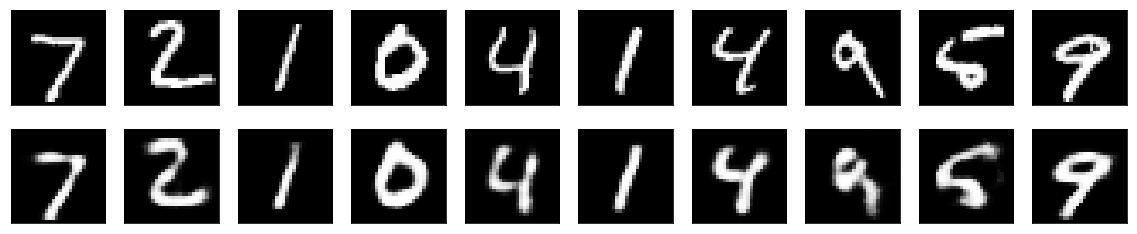

In [6]:
%pylab inline
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()